In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from matplotlib import cm
import re

In [ ]:
df=pd.read_csv('datasets/Reduced_clean_laptops.csv')

In [ ]:
df.head()

,Rating,verified,reviewerID,asin,reviewerName,unixReviewTime,category,description,title,also_buy,...,similar_item,date,price,review_text,rating_class,clean_text,year,token,review_length,review_length_bin
0,5,True,A36O9HQS83TUX6,1254875778,Rafael Antonio herrera,1412985600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Five Stars excellent salesman problem solved,good,five star excellent salesman problem solve,2014,"['five', 'star', 'excellent', 'salesman', 'pro...",6,"(0, 100]"
1,5,True,A358J4WU5B0Y9Q,1254875778,G4M,1409184000,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"Great RAM, Got them to be used with SuperMicro...",good,great ram get use supermicro receive time grea...,2014,"['great', 'ram', 'get', 'use', 'supermicro', '...",33,"(0, 100]"
2,5,True,A1QSBRR1IFFSD0,1254875778,Tech nerd,1388102400,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Works perfectly. No issues here. Used this RAM...,good,work perfectly no issue use ram double current...,2013,"['work', 'perfectly', 'no', 'issue', 'use', 'r...",26,"(0, 100]"
3,5,True,A2UGZCGCYPBMNA,1254875778,Larry Butler,1373500800,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,Good memory at a great price 2GB really peps u...,good,good memory great price gb really peps win net...,2013,"['good', 'memory', 'great', 'price', 'gb', 're...",50,"(0, 100]"
4,1,True,A3H150XFJ7S4KE,1254875778,93TransAmLT1,1367193600,"['Electronics', 'Computers &amp; Accessories',...",['REFURBISHED - Hynix 2GB DDR3 Memory SO-DIMM ...,Hynix 2GB DDR3 Memory SO-DIMM 204pin PC3-10600...,[],...,"class=""a-bordered a-horizontal-stripes a-spa...","October 30, 2012",$8.95,"This comany is a joke, DON'T buy from them unl...",bad,comany joke not buy unless like problems amama...,2013,"['comany', 'joke', 'not', 'buy', 'unless', 'li...",197,"(100, 200]"


### Total reviews per rating

In [ ]:
df_count=df.groupby('Rating').count()['reviewerID']
df_count

Rating
1     727
2     462
3     702
4    1626
5    7444
Name: reviewerID, dtype: int64

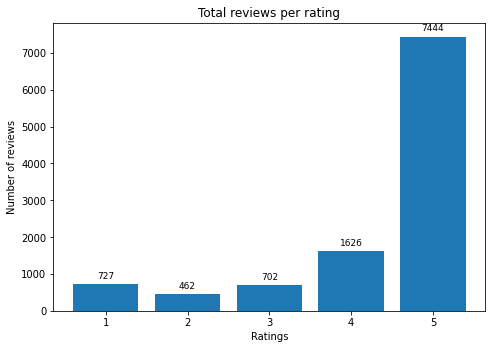

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ratings = list(df_count.index)
count = list(df_count)
ax.bar(ratings,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.title('Total reviews per rating')
plt.xlabel('Ratings')
plt.ylabel('Number of reviews')
plt.show()

### Top 20 reviewed brands

In [ ]:
df_brand=df.groupby('brand').count()['reviewerID'].sort_values(ascending=False)
df_brand[:20]

brand
StarTech           1379
APC                1214
Koss                749
Cyber Acoustics     682
Tripp Lite          526
Klipsch             463
PNY                 419
Creative            414
3M                  411
Targus              345
C&E                 336
TRENDnet            289
PCToys              281
Kingston            276
AVerMedia           263
Kensington          227
Canon               215
Belkin              206
Crucial             181
Metro Vacuum        176
Name: reviewerID, dtype: int64

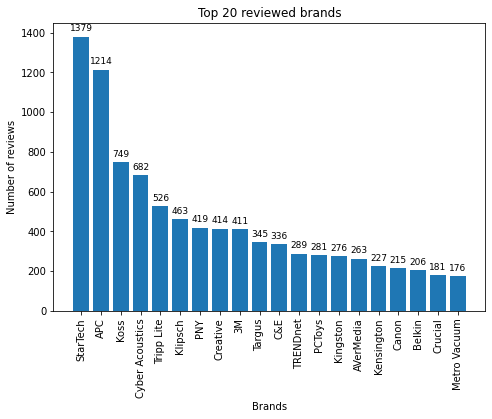

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brands = list(df_brand.index[:20])
count = list(df_brand)[:20]
ax.bar(brands,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed brands')
plt.xlabel('Brands')
plt.ylabel('Number of reviews')
plt.show()

### Top 20 average ratings per brand

In [ ]:
df_mean_rating = df.groupby('brand').agg({'Rating':'mean'}).sort_values(by=['Rating'],ascending=False)

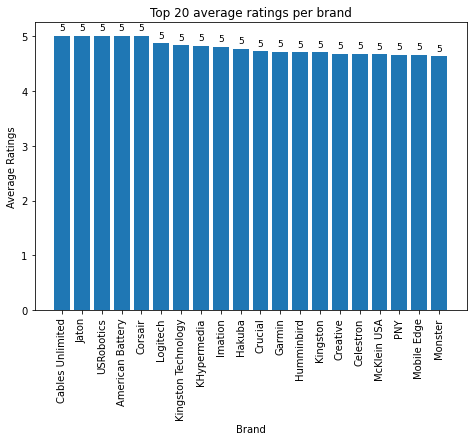

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
brands = list(df_mean_rating.index[:20])
count = list(df_mean_rating['Rating'])[:20]
ax.bar(brands,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 average ratings per brand')
plt.xlabel('Brand')
plt.ylabel('Average Ratings')
plt.show()

In [ ]:
count = list(df_mean_rating)[:20]
count

['Rating']

In [ ]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'rating_class', 'clean_text', 'year',
       'token', 'review_length', 'review_length_bin'],
      dtype='object')

### Top 20 reviewed products

In [ ]:
df_product=df.groupby('title').count()['reviewerID'].sort_values(ascending=False)

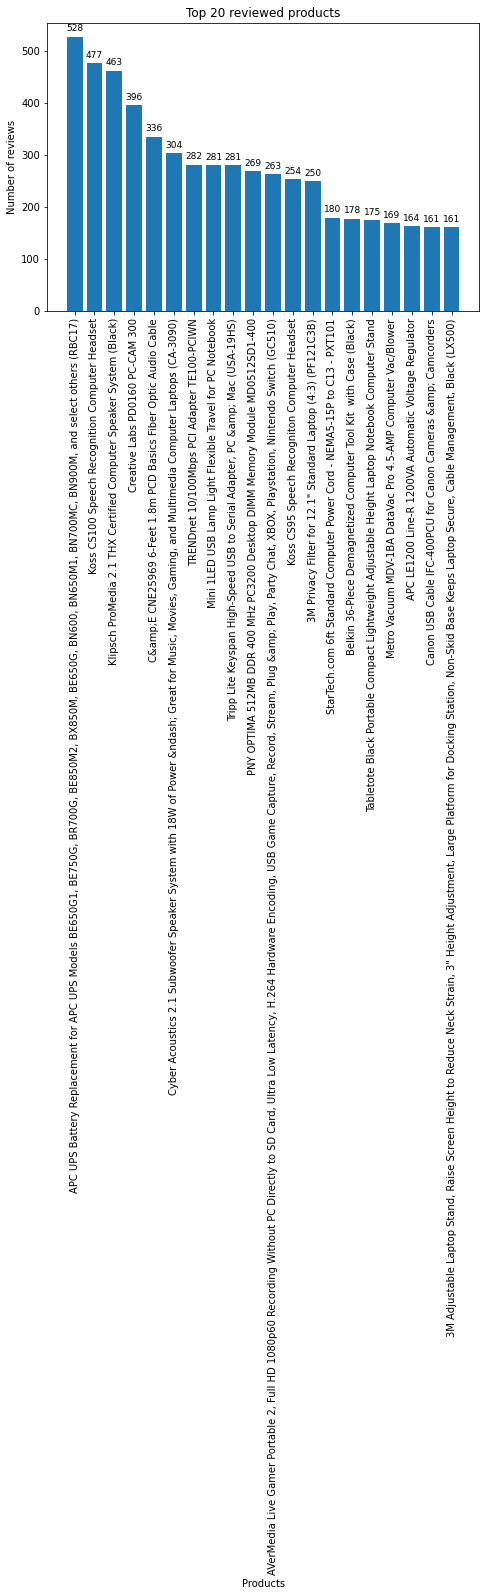

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
products = list(df_product.index[:20])
count = list(df_product)[:20]
ax.bar(products,count)
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=9, xytext=(0, 8), 
                   textcoords='offset points') 
plt.xticks(rotation=90)
plt.title('Top 20 reviewed products')
plt.xlabel('Products')
plt.ylabel('Number of reviews')
plt.show()

In [ ]:
df_verified=df.groupby('verified').count()['reviewerID'].sort_values(ascending=False)
df_verified

verified
True     10207
False      754
Name: reviewerID, dtype: int64

In [ ]:
df_rating_class=df.groupby('rating_class').count()['reviewerID'].sort_values(ascending=False)
df_rating_class

rating_class
good    9772
bad     1189
Name: reviewerID, dtype: int64

### Disitribution of Categories

In [ ]:
df['category'] = df['category'].apply(eval)

In [ ]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

In [ ]:
df_category = pd.DataFrame(to_1D(df['category']).value_counts(),columns=['count']).reset_index()
df_category.rename({'index': 'category'},axis=1,inplace=True)
df_category['category'] = df_category['category'].map(lambda x: re.sub(r'&amp;', '&', x))
df_category.loc[df_category['count'] < 1000, 'category'] = 'Others'
df_category.drop(df_category[df_category['category'] =='Electronics'].index,inplace=True)

others_count=df_category[df_category['category'] == 'Others']['count'].sum()
df_category.drop(df_category[df_category['category'] =='Others'].index,inplace=True)
df_category.loc[len(df_category.index)] = ['Others',others_count]
df_category


,category,count
1,Computers & Accessories,5147
2,Computers & Accessories,3637
3,Computer Accessories & Peripherals,2923
4,Audio & Video Accessories,2720
5,Computer Components,2348
6,Internal Components,2299
7,Computer Accessories & Peripherals,1884
8,Computer Speakers,1324
9,Accessories & Supplies,1224
10,Others,16782


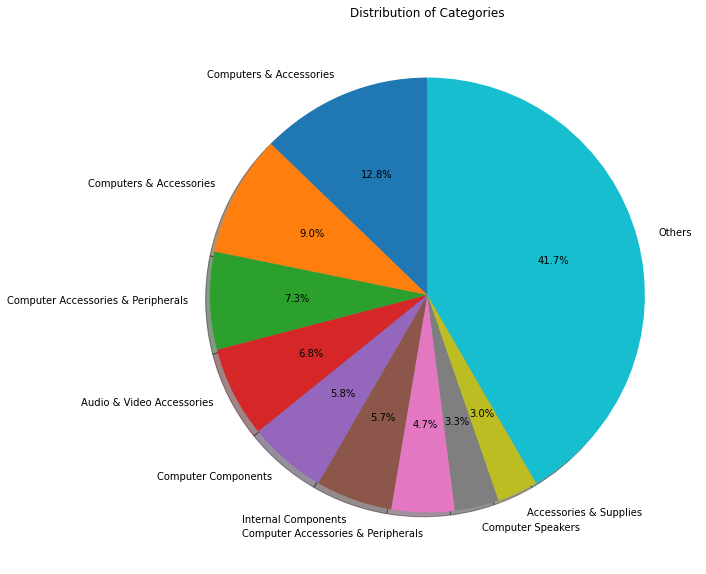

In [ ]:
category = df_category['category']
sizes = df_category['count']
#fig1, ax1 = plt.subplots()
plt.figure(figsize=(50, 10))
cs=cm.Set1(np.arange(len(category))/10.)
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Distribution of Categories')
plt.show()

### Ratings for Top 10 reviewed brands

In [ ]:
df_rating_brand=df.loc[df['brand'].isin(df_brand[:10].index)]
df_rating_brand=pd.DataFrame(df_rating_brand.groupby(['brand', 'Rating']).size(),columns=[''])
df_rating_brand

brand           Rating      
3M              1         33
                2         28
                3         42
                4         88
                5        220
APC             1         78
                2         42
                3         42
                4        144
                5        908
Creative        1          7
                2          9
                3         15
                4         49
                5        334
Cyber Acoustics 1         60
                2         52
                3         89
                4        130
                5        351
Klipsch         1         51
                2         36
                3         31
                4         33
                5        312
Koss            1         58
                2         40
                3         78
                4        138
                5        435
PNY             1         11
                2          5
                3         13
                4         58
                5        332
StarTech        1         61
                2         32
                3         63
                4        181
                5       1042
Targus          1         18
                2         17
                3         12
                4         62
                5        236
Tripp Lite      1         31
                2         12
                3         24
                4         55
                5        404

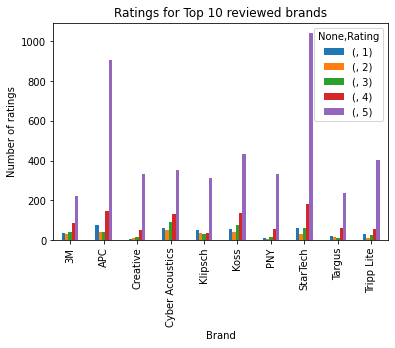

In [ ]:
df_rating_brand.unstack().plot(kind='bar')
plt.title('Ratings for Top 10 reviewed brands')
plt.xlabel('Brand')
plt.ylabel('Number of ratings')
plt.show()

In [ ]:
df_brand_class = df.groupby(['brand','rating_class']).agg({'Rating':'sum'}).sort_values(by=['brand','rating_class'],ascending=False)
df_brand_class

Rating
brand          rating_class        
ZCMYFA         good             237
               bad                9
Yamakasi       good              58
               bad               15
WAREHOUSEDEALS good              55
...                             ...
ASINNO         bad                4
APC            good            5242
               bad              162
3M             good            1578
               bad               89

[160 rows x 1 columns]

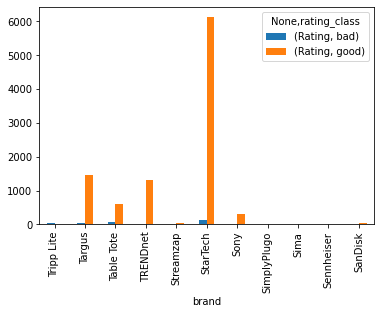

In [ ]:
df_brand_class[10:30].unstack().plot(kind='bar', stacked=False)

In [ ]:
df.columns

Index(['Rating', 'verified', 'reviewerID', 'asin', 'reviewerName',
       'unixReviewTime', 'category', 'description', 'title', 'also_buy',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'review_text', 'rating_class', 'clean_text', 'year',
       'token', 'review_length', 'review_length_bin'],
      dtype='object')

### Distribution of main catgeories

In [ ]:
df['main_cat'] = df['main_cat'].map(lambda x: re.sub(r'&amp;', '&', x))
df_main_category = pd.DataFrame(df['main_cat'].value_counts()).reset_index()
df_main_category.columns=['category','count']
df_main_category.drop(df_main_category[df_main_category['category'] =='All Electronics'].index,inplace=True)
df_main_category


,category,count
1,Home Audio & Theater,1984
2,Computers,1519
3,Office Products,344
4,Camera & Photo,234
5,"Arts, Crafts & Sewing",89
6,Amazon Home,59
7,Cell Phones & Accessories,46
8,Musical Instruments,22
9,Car Electronics,11
10,Sports & Outdoors,11


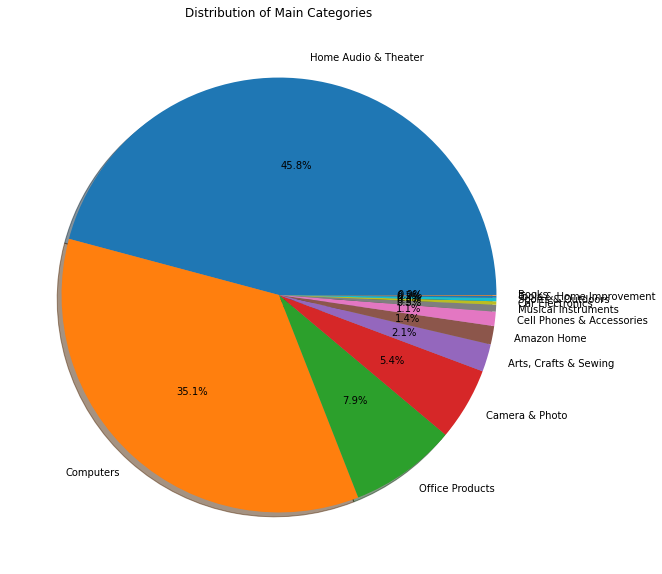

In [ ]:
category = df_main_category['category']
sizes = df_main_category['count']
#fig1, ax1 = plt.subplots()
explode = (0, 0, 0, 0, 0, 0,0,1.0,1.0,1.0,1.0,1.0)
plt.figure(figsize=(30, 10))
plt.pie(sizes, labels=category, autopct='%1.1f%%',
        shadow=True, startangle=0)
plt.title('Distribution of Main Categories')
plt.show()

In [ ]:
df['rank'] = df['rank'].map(lambda x: re.sub(r'&amp;', '&', x))
df['rank'] = df['rank'].map(lambda x: re.sub(r'&gt;', ',', x))

In [ ]:
len(explode)

12